In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [5]:
def analyze_correlation(dengue_data, factors_data):
    """
    Performs correlation analysis between dengue cases/forecasts and given factors.

    Args:
        dengue_data (pd.DataFrame): DataFrame with 'Day', 'Actual_Cases', and 'Forecast_Cases' columns.
        factors_data (pd.DataFrame): DataFrame with 'Day' and columns for each factor.

    Returns:
        pd.DataFrame: A table showing the correlation coefficient (r) and p-value for each pair.
    """
    # Merge the dataframes on the 'Day' column
    df_merged = pd.merge(dengue_data, factors_data, on='Day', how='inner')
    
    # Initialize a list to store results
    results = []
    
    # List of dengue variables to correlate
    dengue_vars = ['Actual_Cases', 'Forecast_Cases']
    
    # List of factor variables to correlate
    factor_vars = [col for col in factors_data.columns if col != 'Day']
    
    # Perform correlation analysis for each pair
    for d_var in dengue_vars:
        for f_var in factor_vars:
            # Calculate Pearson correlation coefficient and p-value
            r, p_value = stats.pearsonr(df_merged[d_var], df_merged[f_var])
            results.append({
                'Dengue Data': d_var,
                'Factor': f_var,
                'Pearson r': r,
                'p-value': p_value
            })
            
            # Create a scatter plot with a trendline
            plt.figure(figsize=(8, 6))
            sns.regplot(x=f_var, y=d_var, data=df_merged)
            plt.title(f'Scatter Plot: {d_var} vs. {f_var}')
            plt.xlabel(f_var)
            plt.ylabel(d_var)
            plt.grid(True)
            plt.show()
    
    # Convert results to a DataFrame for easy viewing
    results_df = pd.DataFrame(results)
    return results_df

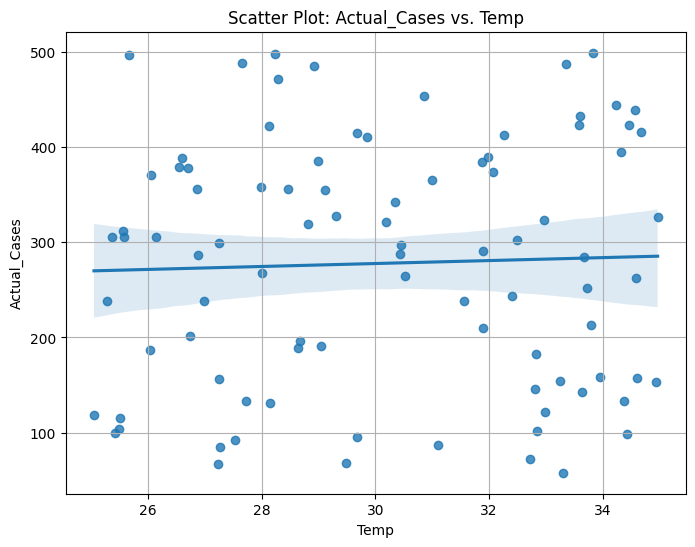

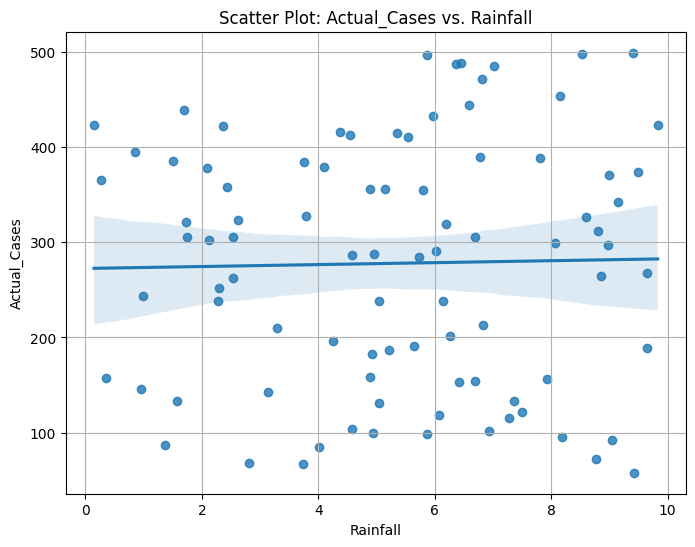

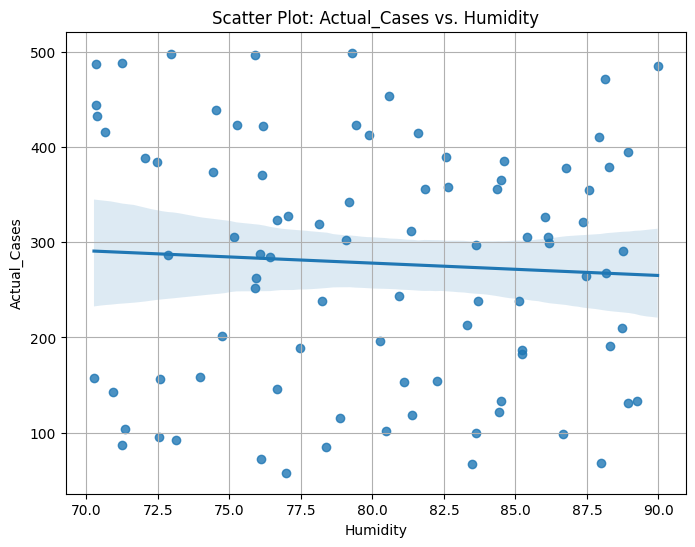

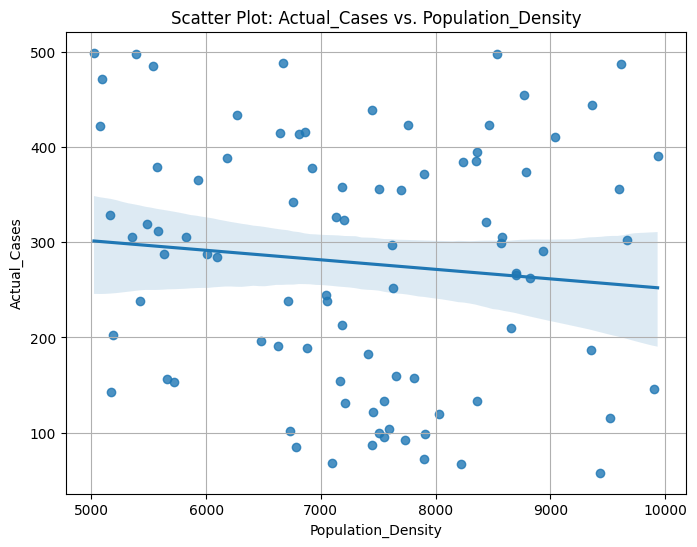

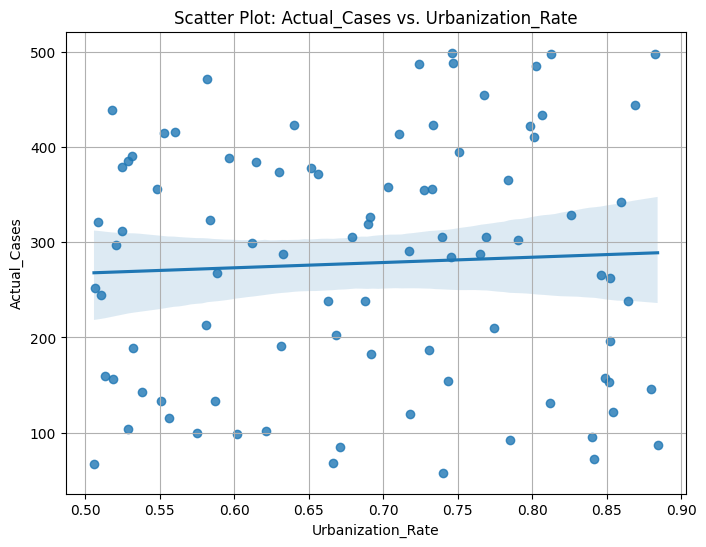

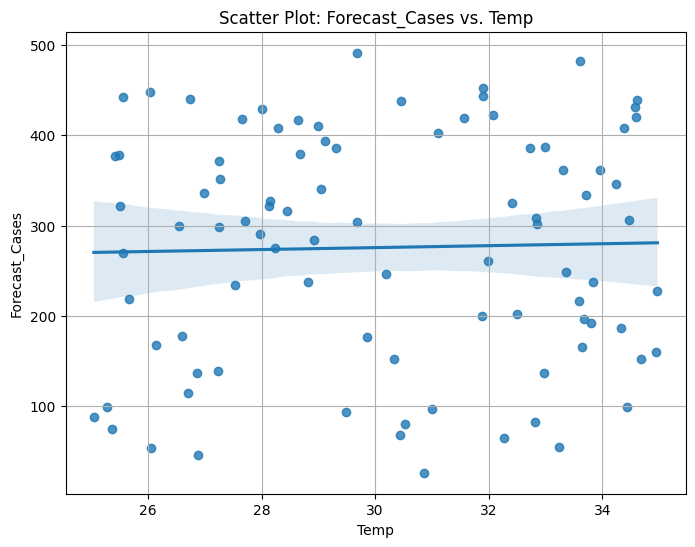

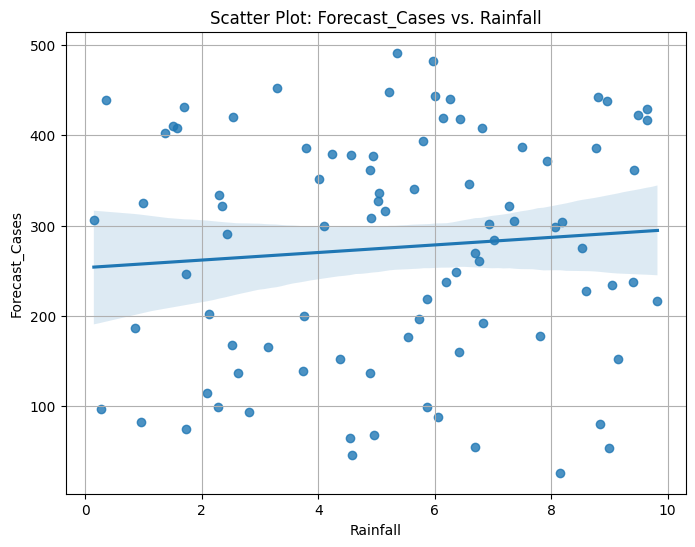

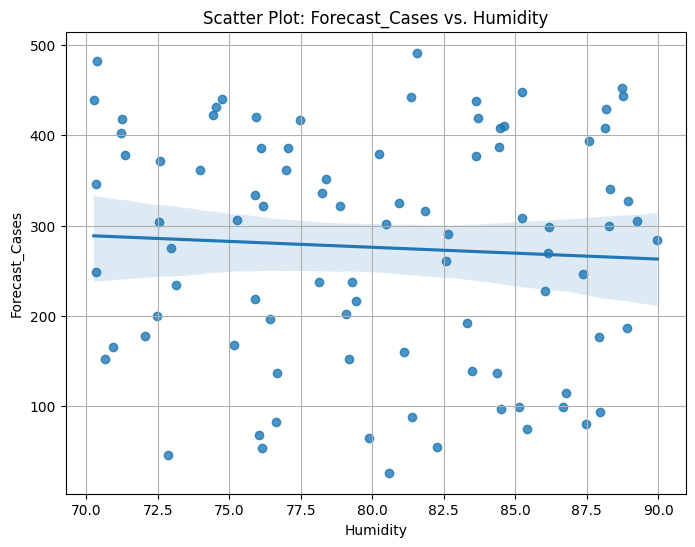

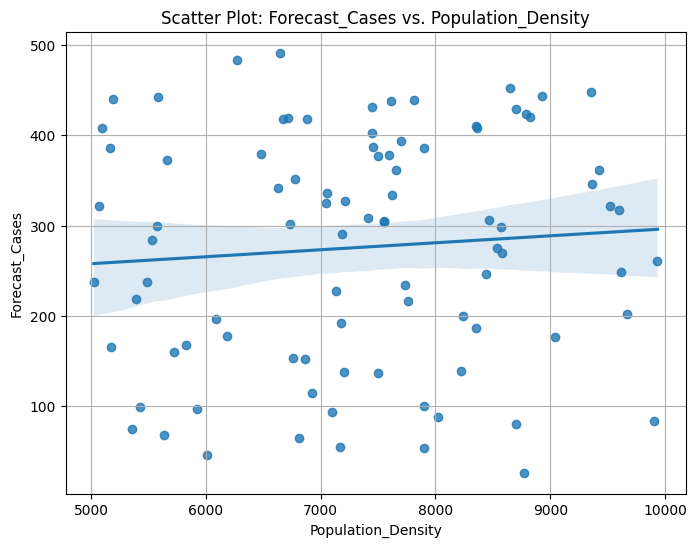

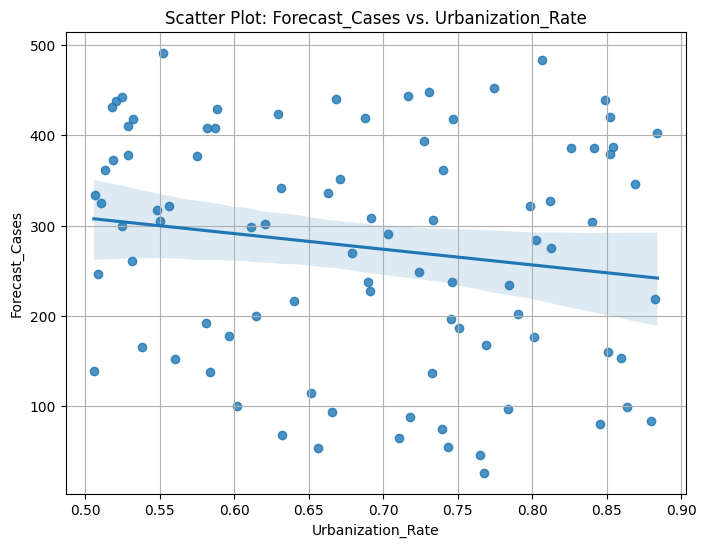

Correlation Analysis Results:
      Dengue Data              Factor  Pearson r   p-value
0    Actual_Cases                Temp   0.037324  0.726894
1    Actual_Cases            Rainfall   0.020986  0.844349
2    Actual_Cases            Humidity  -0.059400  0.578119
3    Actual_Cases  Population_Density  -0.102884  0.334563
4    Actual_Cases   Urbanization_Rate   0.050821  0.634288
5  Forecast_Cases                Temp   0.026017  0.807689
6  Forecast_Cases            Rainfall   0.087004  0.414843
7  Forecast_Cases            Humidity  -0.060089  0.573714
8  Forecast_Cases  Population_Density   0.079873  0.454252
9  Forecast_Cases   Urbanization_Rate  -0.159912  0.132181


In [6]:
# ----------------- DEMO USAGE -----------------
# Create sample dataframes for demonstration purposes
# In your actual project, you would load your real data here
# Example Dengue Data
dengue_data = pd.DataFrame({
    'Day': np.arange(1, 91),
    'Actual_Cases': np.random.randint(50, 500, 90),
    'Forecast_Cases': np.random.randint(50, 500, 90) + np.random.normal(0, 20, 90)
})

# Example Factors Data
factors_data = pd.DataFrame({
    'Day': np.arange(1, 91),
    'Temp': np.random.uniform(25, 35, 90),
    'Rainfall': np.random.uniform(0, 10, 90),
    'Humidity': np.random.uniform(70, 90, 90),
    'Population_Density': np.random.uniform(5000, 10000, 90),
    'Urbanization_Rate': np.random.uniform(0.5, 0.9, 90)
})

# Call the function to perform the analysis
correlation_results = analyze_correlation(dengue_data, factors_data)

# Print the results table
print("Correlation Analysis Results:")
print(correlation_results)